In [1]:
import os
import pandas as pd
import platform

path = "Files"
dirs = os.walk( path )

if platform.system() == 'Linux':
    separador = '/'
else:
    separador = '\\'


# todos los archivos y directorios dentro del path
contenido = []
for file in dirs:
    contenido.append(file)


# filtra archivos *.php de todos los subdirectorios
fcosa = []
numero_de_phps = 0

for file in contenido:

    if len(file[2]) == 0:
        contenido.remove(file)
    else:
        temp = [archivo for archivo in file[2] if '.php' in archivo]

        if len(temp) > 0:
            fcosa.append([file[0], temp])
            numero_de_phps += len(temp)

In [2]:
Tags = { "<!--", "-->", "<!DOCTYPE>", "<a>", "<abbr>", "<acronym>", "<address>", 
        "<applet>", "<area>", "<article>", "<aside>", "<audio>", "<b>", "<base>",
        "<basefont>", "<bdi>", "<bdo>", "<big>", "<blockquote>", "<body>", "<br>",
        "<button>", "<canvas>", "<caption>", "<center>", "<cite>", "<code>", 
        "<col>", "<colgroup>", "<data>", "<datalist>", "<dd>", "<del>",
        "<details>", "<dfn>", "<dialog>", "<dir>", "<div>",  "<dl>", "<dt>",
        "<em>", "<embed>", "<fieldset>", "<figcaption>", "<figure>", "<font>",
        "<footer>", "<form>", "<frame>", "<frameset>", "<h1>", "<h2>", "<h3>", 
        "<h4>", "<h5>", "<h6>", "<head>", "<header>", "<hr>", "<html>", "<i>",
        "<iframe>", "<img>", "<input>", "<ins>", "<kbd>", "<label>", "<legend>",
        "<li>", "<link>", "<main>", "<map>", "<mark>", "<meta>", "<meter>", 
        "<nav>", "<noframes>","<noscript>", "<object>", "<ol>", "<optgroup>", 
        "<option>", "<output>", "<p>", "<param>", "<picture>", "<pre>", 
        "<progress>", "<q>", "<rp>", "<rt>", "<ruby>", "<s>", "<samp>", 
        "<script>", "<section>", "<select>", "<small>", "<source>", "<span>", 
        "<strike>", "<strong>", "<style>", "<sub>", "<summary>", "<sup>", 
        "<svg>", "<table>", "<tbody>", "<td>", "<template>", "<textarea>",
        "<tfoot>", "<th>", "<thead>", "<time>", "<title>", "<tr>", "<track>",
        "<tt>", "<u>", "<ul>", "<var>", "<video>", "<wbr>"}

In [3]:
# include, require y href las enlazadoras de php OJO

def ref_doc(carpeta, doc):
    
    archivos_en_directorio = []
    for directorio, archivos in fcosa:
        # archivos_en_directorio.extend(archivos) # todos los directorios
        if carpeta == directorio:
            archivos_en_directorio.extend(archivos) 

    doc_lineas = doc.split('\n')
    enlazadores = ['href', 'include', 'require']
    
    refe = ''
    for linea in doc_lineas:
        
        link = list(set([enlace for enlace in enlazadores if(enlace in linea)]))
        file = list(set([nombre for nombre in archivos_en_directorio if(nombre in linea)]))
        if  len(link) > 0 and len(file) > 0:
            refe += link[0] + '*' + file[0] + '#'

    refe = '#' if len(refe) == 0 else refe
    return refe # referidos


clasificacion = []

for directorio, archivos in fcosa:

    print("Directorio: ", directorio, "\n")

    es_mysql = False
    es_html = False
    es_form = False
    es_post = False
    es_funcion = False

    for archivo in archivos:

        with open(directorio+'/'+archivo) as f:

            doc = f.read()
            
            es_mysql = "mysql" in doc   # codigo contiene llamadas a sql
            
            es_form = "form" in doc   # codigo contiene formulario
            
            es_post = "$_POST" in doc   # codigo lee post de un formulario
            
            es_funcion = "function" in doc 

            word_doc = set(doc.split())
             
            if len(Tags.intersection(word_doc)) > 0: es_html = True # codigo contiene html

            # Clasificacion primitiva
            if es_mysql and not es_html:
                tipo = 'mysql'
            elif not es_mysql and es_html:
                tipo = 'html'
            elif es_mysql and es_html:
                tipo = 'hibrido'
            else:
                tipo = 'otro'

            referidos = ref_doc(directorio, doc)
            
            es_mysql = 1 if es_mysql else 0
            es_html = 1 if es_html else 0
            es_form = 1 if es_form else 0
            es_post = 1 if es_post else 0
            es_funcion = 1 if es_funcion else 0
            
            clasificacion.append({'path': directorio, 'archivo': archivo, 'tipo': tipo, 'referidos': referidos,
                                 'mysql': es_mysql, 'html': es_html, 'form': es_form, 'post': es_post,
                                  'funcion': es_funcion})

            print("****** Archivo: ", archivo, 'tipo :', tipo, "******", "\n")

Directorio:  Files 

****** Archivo:  header.php tipo : hibrido ****** 

****** Archivo:  footer.php tipo : hibrido ****** 

****** Archivo:  function.php tipo : hibrido ****** 

****** Archivo:  contact.php tipo : hibrido ****** 

****** Archivo:  index.php tipo : hibrido ****** 

****** Archivo:  include-navbar.php tipo : hibrido ****** 

****** Archivo:  menu.php tipo : hibrido ****** 

Directorio:  Files/asset/js-old/sky-forms-pro/skyforms/captcha 

****** Archivo:  image.php tipo : otro ****** 

****** Archivo:  process.php tipo : otro ****** 

Directorio:  Files/admin 

****** Archivo:  signout.php tipo : otro ****** 

****** Archivo:  addmenu.php tipo : hibrido ****** 

****** Archivo:  services.php tipo : hibrido ****** 

****** Archivo:  pp-tos.php tipo : hibrido ****** 

****** Archivo:  setgeneral.php tipo : hibrido ****** 

****** Archivo:  ticket-details.php tipo : hibrido ****** 

****** Archivo:  changepassword.php tipo : hibrido ****** 

****** Archivo:  addmoneylog.php

****** Archivo:  CardErrorTest.php tipo : otro ****** 

****** Archivo:  WebhookTest.php tipo : otro ****** 

****** Archivo:  UtilDefaultLoggerTest.php tipo : otro ****** 

****** Archivo:  AuthenticationErrorTest.php tipo : otro ****** 

****** Archivo:  TransferTest.php tipo : otro ****** 

****** Archivo:  ExternalAccountTest.php tipo : otro ****** 

****** Archivo:  InvalidRequestErrorTest.php tipo : otro ****** 

****** Archivo:  ApplicationFeeTest.php tipo : otro ****** 

****** Archivo:  SourceTest.php tipo : otro ****** 

****** Archivo:  BankAccountTest.php tipo : otro ****** 

****** Archivo:  bootstrap.php tipo : otro ****** 

****** Archivo:  PermissionsErrorTest.php tipo : otro ****** 

****** Archivo:  RateLimitErrorTest.php tipo : otro ****** 

****** Archivo:  TokenTest.php tipo : otro ****** 

****** Archivo:  ThreeDSecureTest.php tipo : otro ****** 

****** Archivo:  RecipientTest.php tipo : otro ****** 

****** Archivo:  PlanTest.php tipo : otro ****** 

****** Arch

In [4]:
datos = pd.DataFrame(clasificacion)

datos['nivel'] = datos['path'].apply(lambda x: len(x.split(separador)))

from sklearn.cluster import KMeans
import numpy as np

X = datos[['form', 'html', 'mysql', 'post', 'funcion']] # , 'nivel' dejando por fuera nivel

# n_cluster = 3 (Model, View or Controler)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

datos['grupo'] = kmeans.labels_

datos.to_csv('datos.csv', index=False)

pd.crosstab(index = datos["path"],  # Make a crosstab
                              columns=datos["grupo"], margins=True)      # Name the count column



grupo,0,1,2,All
path,,,,
Files,0,3,4,7
Files/admin,2,19,11,32
Files/admin/include,0,1,2,3
Files/asset/js-old/sky-forms-pro/skyforms/captcha,2,0,0,2
Files/member,3,14,34,51
Files/member/assets/plugins/sky-forms-pro/skyforms/captcha,2,0,0,2
Files/member/coingate-php,1,0,0,1
Files/member/coingate-php/lib,4,0,0,4
Files/member/coingate-php/lib/Merchant,1,0,0,1


In [5]:
import os
import pandas as pd
import platform

datos = pd.read_csv("datos.csv") 

if platform.system() == 'Linux':
    separador = '/'
else:
    separador = '\\'

print(datos.tail())
print(datos.shape)

                                                  path  \
218                    Files/member/coingate-php/tests   
219                    Files/member/coingate-php/tests   
220                    Files/member/coingate-php/tests   
221  Files/member/assets/plugins/sky-forms-pro/skyf...   
222  Files/member/assets/plugins/sky-forms-pro/skyf...   

                       archivo  tipo              referidos  mysql  html  \
218               TestCase.php  otro                      #      0     0   
219              bootstrap.php  otro  require*TestCase.php#      0     0   
220  bootstrap.no_autoload.php  otro  require*TestCase.php#      0     0   
221                  image.php  otro                      #      0     0   
222                process.php  otro                      #      0     0   

     form  post  funcion  nivel  grupo  
218     0     0        1      4      0  
219     0     0        0      4      0  
220     0     0        0      4      0  
221     0     0        0      

In [81]:

datos.loc[datos['form']==1]


,archivo,form,html,mysql,path,post,referidos,tipo,nivel,grupo
0,contact.php,1,1,1,Files,1,include*header.php#include*footer.php#,hibrido,1,1
2,function.php,1,1,1,Files,0,#,hibrido,1,1
3,header.php,1,1,1,Files,0,require*function.php#href*contact.php#,hibrido,1,1
5,index.php,1,1,1,Files,0,include*header.php#include*footer.php#,hibrido,1,1
6,menu.php,1,1,1,Files,0,include*header.php#include*footer.php#,hibrido,1,1
8,addmenu.php,1,1,1,Files\admin,1,#,hibrido,2,1
9,addmethodsetting.php,1,1,1,Files\admin,1,#,hibrido,2,1
11,balanceuser.php,1,1,1,Files\admin,1,#,hibrido,2,1
12,balanceuserminus.php,1,1,1,Files\admin,1,#,hibrido,2,1
13,changepassword.php,1,1,1,Files\admin,1,#,hibrido,2,1


In [2]:

if platform.system() == 'Linux':
    print(datos.loc[datos['path']==r'Files/member/stripe-php/lib/Util'])
elif platform.system() == 'Windows':
    print(datos.loc[datos['path']==r'Files\member\stripe-php\lib\Util'])


                    archivo                              path referidos  tipo  \
187  AutoPagingIterator.php  Files\member\stripe-php\lib\Util        []  otro   
188       DefaultLogger.php  Files\member\stripe-php\lib\Util        []  otro   
189     LoggerInterface.php  Files\member\stripe-php\lib\Util        []  otro   
190      RequestOptions.php  Files\member\stripe-php\lib\Util        []  otro   
191                 Set.php  Files\member\stripe-php\lib\Util        []  otro   
192                Util.php  Files\member\stripe-php\lib\Util        []  otro   

     nivel  
187      5  
188      5  
189      5  
190      5  
191      5  
192      5  


In [6]:
import numpy as np

class Arbolito:
    
    def __init__(self, datos):
        
        caminos = datos.path
        
        caminos = list(set(caminos))

        maximo = 0

        temp = []
        for camino in caminos:
            temp.append(camino.split(separador))
            if len(camino.split(separador)) > maximo:
                maximo = len(camino.split(separador))
        caminos = temp.copy()

        alt_caminos = []
        for camino in caminos:
            temp = ''
            for nodo in camino:
                temp += nodo+separador
                alt_caminos.append(temp[:-(len(separador)+len(nodo))]+'**'+ nodo)

        alt_caminos = list(set(alt_caminos))

        for i in range(len(alt_caminos)):
            alt_caminos[i] = alt_caminos[i].split('**')
            alt_caminos[i] = {'direccion': alt_caminos[i][0], 'nombre': alt_caminos[i][1]}

        alt_caminos = np.array(alt_caminos)


        def __buscar_hijos(direccion, nombre):
            hijos = [x['nombre'] for x in alt_caminos if x['direccion']==direccion+nombre+separador]
            return hijos
        
        def __buscar_padre(direccion, nombre):
            dir_list = direccion.split(separador)
            posicion = -2 if len(dir_list)>1 else -1
            padre = dir_list[posicion] # penultimo porque ultimo siempre es vacio por contener separador al final
            return padre

        def __buscar_frutas(direccion, nombre):
            # frutas = list(datos[datos['path']==direccion+nombre]['archivo'].values)
            
            a = datos.loc[datos['path']==direccion+nombre, ['archivo','referidos']]
            frutas = []
            for index, row in a.iterrows():
                i_targets = row['referidos'].split('#')
                targets = [target.split('*') for target in i_targets if len(target)>0]
                source  = row['archivo']
                if len(targets)>0:
                    frutas.extend({'source':source, 'nexo': target[0], 'target': target[1]} for target in targets)
                else:
                    frutas.append({'source':source, 'nexo': 'default','target': nombre})
            return frutas
        
        
        def __numprgs(direccion, nombre):
            a = datos.loc[datos['path']==direccion+nombre]
            prgs   = list(datos[datos['path']==direccion+nombre]['archivo'].values)
            clases = []
            for programa in prgs:
                b = a.loc[a['archivo']==programa, 'grupo'].values[0]
                clases.append([programa, b])
            
            return clases

        def __buscar_nivel(direccion, nombre):
            dir_list = direccion.split(separador)
            return len(dir_list)


        def __ramas():
            
            ramas = []
            
            for camino in alt_caminos:
                parent = __buscar_padre(camino['direccion'], camino['nombre'])
                frutas = __buscar_frutas(camino['direccion'], camino['nombre'])
                progms = __numprgs(camino['direccion'], camino['nombre'])
                hijos  = __buscar_hijos(camino['direccion'], camino['nombre'])
                nivel  = __buscar_nivel(camino['direccion'], camino['nombre'])
                rama = {'parent': parent, 'name': camino['nombre'], 'frutas': frutas, 
                        'children': hijos, 'nivel': str(nivel), 'progms': progms}
                ramas.append(rama)
                
            return ramas    
                
        ramas = __ramas()
        self.ramas = ramas
        
        def __agrega_hijo(abuelo, padre):
            for rama in ramas:

                if rama['name'] == padre and rama['parent'] == abuelo:

                    dat_niv = {'name': str(rama['name']), 'parent': str(rama['parent']),
                               'frutas': rama['frutas'], 'nivel': rama['nivel'], 'progms': rama['progms']}
                    dat_niv['children'] = [__agrega_hijo(rama['name'], children) for children in rama['children']]

                    if dat_niv['children'] == [None] or dat_niv['children'] == [None, None]:
                        dat_niv.pop('children')

                    return dat_niv        
        
        def __crearbol():
            treeData = []
            
            for rama in ramas:
                if int(rama['nivel']) == 1:
                    dat_anid = {'name': rama['name'], 'parent': rama['parent'],
                                'frutas': rama['frutas'], 'nivel': rama['nivel'], 'progms': rama['progms']}
                    dat_anid['children'] = [__agrega_hijo(rama['name'], children) for children in rama['children']]
                    break                
            treeData.append(dat_anid)
            
            return treeData
        
        self.arbol = __crearbol()


In [7]:
a = Arbolito(datos)

treeData = 'var arbol = '+ str(a.arbol) + ';'

treeData = treeData.replace("{'source':", "{source:")
treeData = treeData.replace(" 'target':", " target:")
treeData = treeData.replace(" 'nexo':", " nexo:")
treeData = treeData.replace(".php", "")

with open('arbol.js', 'w') as js_file:
    js_file.write(treeData)
    

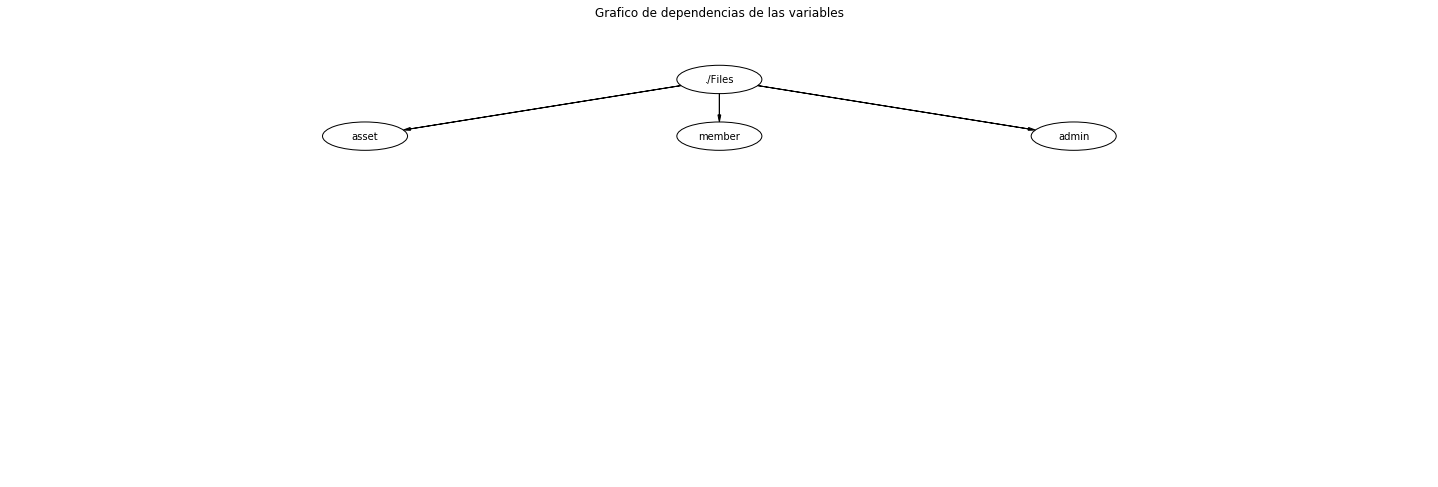

In [23]:
# pendiente con esto para los phps

import matplotlib.pyplot as plt
%matplotlib inline
import daft
from daft import PGM


filas = a.profundidad+1
columnas = len(a.ramas)

raices = a.raices

pgm = PGM(shape=[columnas, filas])

def agrega_nodo(padre, nivel, centroide, fila):
    separador = 2*centroide/(1+len(a.ramas[nivel]['children']))
    i = 1
    for hijo in a.ramas[nivel]['children']:
        col = i * separador
        i += 1
        pgm.add_node(daft.Node(hijo, hijo, col, fila-1, aspect =3))
        pgm.add_edge(padre, hijo)
        #agrega_nodo(hijo, col, fila-1)

for raiz in raices:
    pgm.add_node(daft.Node(raiz, raiz, columnas/(len(raices)+1), filas-len(raices), aspect =3))
    agrega_nodo(raiz, 0, columnas/(len(raices)+1), filas-len(raices))



"""

pgm.add_node(daft.Node(arbolito[0]['name'], arbolito[0]['name'], columnas/2, filas-1, aspect =3))

pgm.add_node(daft.Node(arbolito[1]['name'], arbolito[1]['name'], columnas/(3*2)+0*columnas/3, filas-2, aspect =3))
pgm.add_node(daft.Node(arbolito[2]['name'], arbolito[2]['name'], columnas/(3*2)+1*columnas/3, filas-2, aspect =3))
pgm.add_node(daft.Node(arbolito[3]['name'], arbolito[3]['name'], columnas/(3*2)+2*columnas/3, filas-2, aspect =3))


pgm.add_edge(arbolito[0]['name'], arbolito[1]['name'])
pgm.add_edge(arbolito[0]['name'], arbolito[2]['name'])
pgm.add_edge(arbolito[0]['name'], arbolito[3]['name'])

"""

pgm.render()
plt.title('Grafico de dependencias de las variables')
plt.show() 


In [26]:
a = datos.loc[datos['path']=='Files']
a['archivo']
b = a.loc[a['archivo']=='function.php', 'grupo'].values[0]
b

1

In [16]:
a

,archivo,form,html,mysql,path,post,referidos,tipo,nivel
0,contact.php,1,1,1,Files,1,include*header.php#include*footer.php#,hibrido,1
1,footer.php,0,1,1,Files,0,#,hibrido,1
2,function.php,1,1,1,Files,0,#,hibrido,1
3,header.php,1,1,1,Files,0,require*function.php#href*contact.php#,hibrido,1
4,include-navbar.php,0,1,1,Files,0,#,hibrido,1
5,index.php,1,1,1,Files,0,include*header.php#include*footer.php#,hibrido,1
6,menu.php,1,1,1,Files,0,include*header.php#include*footer.php#,hibrido,1


In [10]:
import json
links = ""

for rama in a.ramas:
    if rama['name'] == 'member':
        titulo_pag = rama['name']
        for fruta in rama['frutas']:
            links += str(fruta) + ','
        break

links = links.replace("{'source':", "{source:")
links = links.replace(" 'target':", " target:")
links = links.replace(" 'type':", " type:")
links = "var referencias = [" + links + "];"
links += "titulo_pag = " + json.dumps(titulo_pag) + ';'

with open('referencias.js', 'w') as js_file:
    js_file.write(links)

In [71]:
a = datos.loc[datos['path']=='Files', ['archivo','referidos']]
refe = []
for index, row in a.iterrows():
    i_targets = row['referidos'].split('#')
    targets = [target.split('*') for target in i_targets if len(target)>0]
    source  = row['archivo']
    print(len(targets))
    if len(targets)>0:
        refe.extend({'source':source, 'nexo': target[0],'target': target[1]} for target in targets)
    else:
        refe.append({'source':source, 'nexo': 'default','target': 'Files'})
refe


2
0
0
2
0
2
2


[{'source': 'contact.php', 'nexo': 'include', 'target': 'header.php'},
 {'source': 'contact.php', 'nexo': 'include', 'target': 'footer.php'},
 {'source': 'footer.php', 'nexo': 'default', 'target': 'Files'},
 {'source': 'function.php', 'nexo': 'default', 'target': 'Files'},
 {'source': 'header.php', 'nexo': 'require', 'target': 'function.php'},
 {'source': 'header.php', 'nexo': 'href', 'target': 'contact.php'},
 {'source': 'include-navbar.php', 'nexo': 'default', 'target': 'Files'},
 {'source': 'index.php', 'nexo': 'include', 'target': 'header.php'},
 {'source': 'index.php', 'nexo': 'include', 'target': 'footer.php'},
 {'source': 'menu.php', 'nexo': 'include', 'target': 'header.php'},
 {'source': 'menu.php', 'nexo': 'include', 'target': 'footer.php'}]

In [43]:
datos.loc[datos['path']=='Files', ['archivo','referidos']]

,archivo,referidos
0,contact.php,"[['include', 'header.php'], ['include', 'foote..."
1,footer.php,[]
2,function.php,[]
3,header.php,"[['require', 'function.php'], ['href', 'contac..."
4,include-navbar.php,[]
5,index.php,"[['include', 'header.php'], ['include', 'foote..."
6,menu.php,"[['include', 'header.php'], ['include', 'foote..."


In [1]:
import pandas as pd

datos = pd.read_csv("datos.csv") 

print(datos.head())
print(datos.shape)

              archivo  form  html  mysql   path  post  \
0         contact.php     1     1      1  Files     1   
1          footer.php     0     1      1  Files     0   
2        function.php     1     1      1  Files     0   
3          header.php     1     1      1  Files     0   
4  include-navbar.php     0     1      1  Files     0   

                         referidos     tipo  nivel  
0     ['footer.php', 'header.php']  hibrido      1  
1                               []  hibrido      1  
2                               []  hibrido      1  
3  ['function.php', 'contact.php']  hibrido      1  
4                               []  hibrido      1  
(239, 9)


In [5]:
from sklearn.cluster import KMeans
import numpy as np
X = datos[['form', 'html', 'mysql', 'post', 'nivel']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

kmeans.cluster_centers_



array([[ 2.10526316e-01,  3.68421053e-01,  1.11022302e-16,
         2.63157895e-01,  5.36842105e+00],
       [ 4.89130435e-01,  9.89130435e-01,  9.02173913e-01,
         5.21739130e-01,  1.94565217e+00],
       [ 7.33944954e-02,  9.17431193e-03,  1.11022302e-16,
        -1.66533454e-16,  3.94495413e+00]])

In [16]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
a = Arbolito(datos)

In [11]:
a.arbol

[{'name': 'Files',
  'parent': '',
  'frutas': [{'source': 'contact.php',
    'target': 'footer.php',
    'type': 'hibrido'},
   {'source': 'contact.php', 'target': 'header.php', 'type': 'hibrido'},
   {'source': 'header.php', 'target': 'function.php', 'type': 'hibrido'},
   {'source': 'header.php', 'target': 'contact.php', 'type': 'hibrido'},
   {'source': 'index.php', 'target': 'footer.php', 'type': 'hibrido'},
   {'source': 'index.php', 'target': 'header.php', 'type': 'hibrido'},
   {'source': 'menu.php', 'target': 'footer.php', 'type': 'hibrido'},
   {'source': 'menu.php', 'target': 'header.php', 'type': 'hibrido'}],
  'nivel': '1',
  'progms': ['contact.php',
   'footer.php',
   'function.php',
   'header.php',
   'include-navbar.php',
   'index.php',
   'menu.php'],
  'children': [{'name': 'admin',
    'parent': 'Files',
    'frutas': [{'source': 'home.php',
      'target': 'matchinggenerate.php',
      'type': 'hibrido'},
     {'source': 'listmenu.php', 'target': 'editmenu.php',

In [1]:
import cv2
cv2.__version__

'4.1.1'

,archivo,form,html,mysql,path,post,referidos,tipo,nivel,grupo
0,contact.php,1,1,1,Files,1,"['footer.php', 'header.php']",hibrido,1,1
1,footer.php,0,1,1,Files,0,[],hibrido,1,1
2,function.php,1,1,1,Files,0,[],hibrido,1,1
3,header.php,1,1,1,Files,0,"['function.php', 'contact.php']",hibrido,1,1
4,include-navbar.php,0,1,1,Files,0,[],hibrido,1,1


In [15]:
datos.head(100)

,archivo,form,html,mysql,path,post,referidos,tipo,nivel,grupo
0,contact.php,1,1,1,Files,1,"['footer.php', 'header.php']",hibrido,1,1
1,footer.php,0,1,1,Files,0,[],hibrido,1,1
2,function.php,1,1,1,Files,0,[],hibrido,1,1
3,header.php,1,1,1,Files,0,"['function.php', 'contact.php']",hibrido,1,1
4,include-navbar.php,0,1,1,Files,0,[],hibrido,1,1
5,index.php,1,1,1,Files,0,"['footer.php', 'header.php']",hibrido,1,1
6,menu.php,1,1,1,Files,0,"['footer.php', 'header.php']",hibrido,1,1
7,abirimageclass.php,0,0,0,Files\admin,0,[],otro,2,1
8,addmenu.php,1,1,1,Files\admin,1,[],hibrido,2,1
9,addmethodsetting.php,1,1,1,Files\admin,1,[],hibrido,2,1


In [10]:
test_string = "There are 2 apples for 4 persons"
  
# initializing test list 
test_list = ['apples', 'oranges'] 
test_dos  = ['are', 'tree']

# printing original string  
print("The original string : " + test_string) 
  
# printing original list  
print("The original list : " + str(test_list)) 
  
# using list comprehension 
# checking if string contains list element 
#res = [ele for ele in test_list if(ele in test_string), ole for ole in test_dos if(ele in test_string)]

res1 = [ele for ele in test_list if(ele in test_string)]
res2 = [ele for ele in test_dos if(ele in test_string)]

# print result 
print("Does string contain any list element : " + str(res1) )
print("Does string contain any list element : " + str(res2) )


The original string : There are 2 apples for 4 persons
The original list : ['apples', 'oranges']
Does string contain any list element : ['apples']
Does string contain any list element : ['are']


In [90]:
a.arbol

[{'name': 'Files',
  'parent': '',
  'frutas': [{'source': 'contact.php',
    'nexo': 'include',
    'target': 'header.php'},
   {'source': 'contact.php', 'nexo': 'include', 'target': 'footer.php'},
   {'source': 'footer.php', 'nexo': 'default', 'target': 'Files'},
   {'source': 'function.php', 'nexo': 'default', 'target': 'Files'},
   {'source': 'header.php', 'nexo': 'require', 'target': 'function.php'},
   {'source': 'header.php', 'nexo': 'href', 'target': 'contact.php'},
   {'source': 'include-navbar.php', 'nexo': 'default', 'target': 'Files'},
   {'source': 'index.php', 'nexo': 'include', 'target': 'header.php'},
   {'source': 'index.php', 'nexo': 'include', 'target': 'footer.php'},
   {'source': 'menu.php', 'nexo': 'include', 'target': 'header.php'},
   {'source': 'menu.php', 'nexo': 'include', 'target': 'footer.php'}],
  'nivel': '1',
  'progms': ['contact.php',
   'footer.php',
   'function.php',
   'header.php',
   'include-navbar.php',
   'index.php',
   'menu.php'],
  'childr